In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## EDA


In [17]:
# Cargar el dataset
data = pd.read_csv('./hds.csv')

# Mostrar las primeras filas del dataset
data.head()


,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [18]:

# Información general del dataset
data.info()

# Estadísticas descriptivas
data.describe()

# Verificar valores nulos
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       70000 non-null 

Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64

C:\Users\carlo\AppData\Local\Temp\ipykernel_14772\2580488160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart_Risk', data=data, palette='Set2')


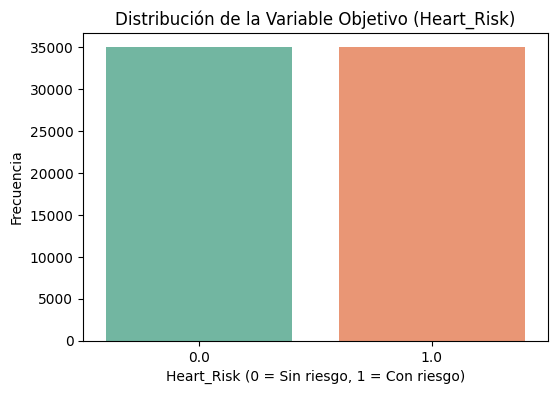

In [4]:
# Distribución de la variable objetivo (Heart_Risk)
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart_Risk', data=data, palette='Set2')
plt.title('Distribución de la Variable Objetivo (Heart_Risk)')
plt.xlabel('Heart_Risk (0 = Sin riesgo, 1 = Con riesgo)')
plt.ylabel('Frecuencia')
plt.show()

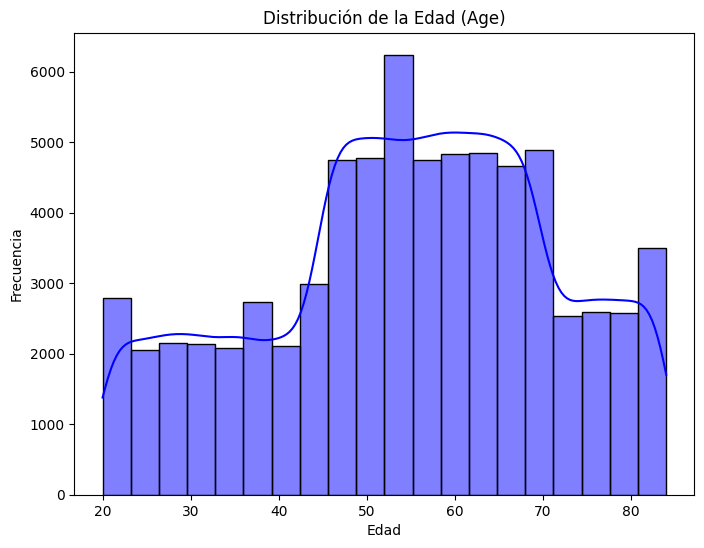

In [5]:
# Distribución de la edad (Age)
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Distribución de la Edad (Age)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_14772\3349931105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Set3')


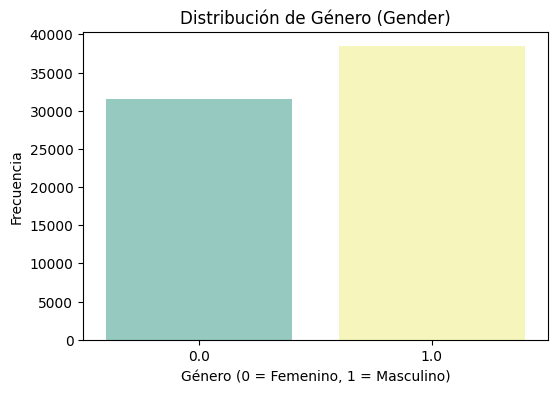

In [6]:
# Distribución de género (Gender)
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, palette='Set3')
plt.title('Distribución de Género (Gender)')
plt.xlabel('Género (0 = Femenino, 1 = Masculino)')
plt.ylabel('Frecuencia')
plt.show()

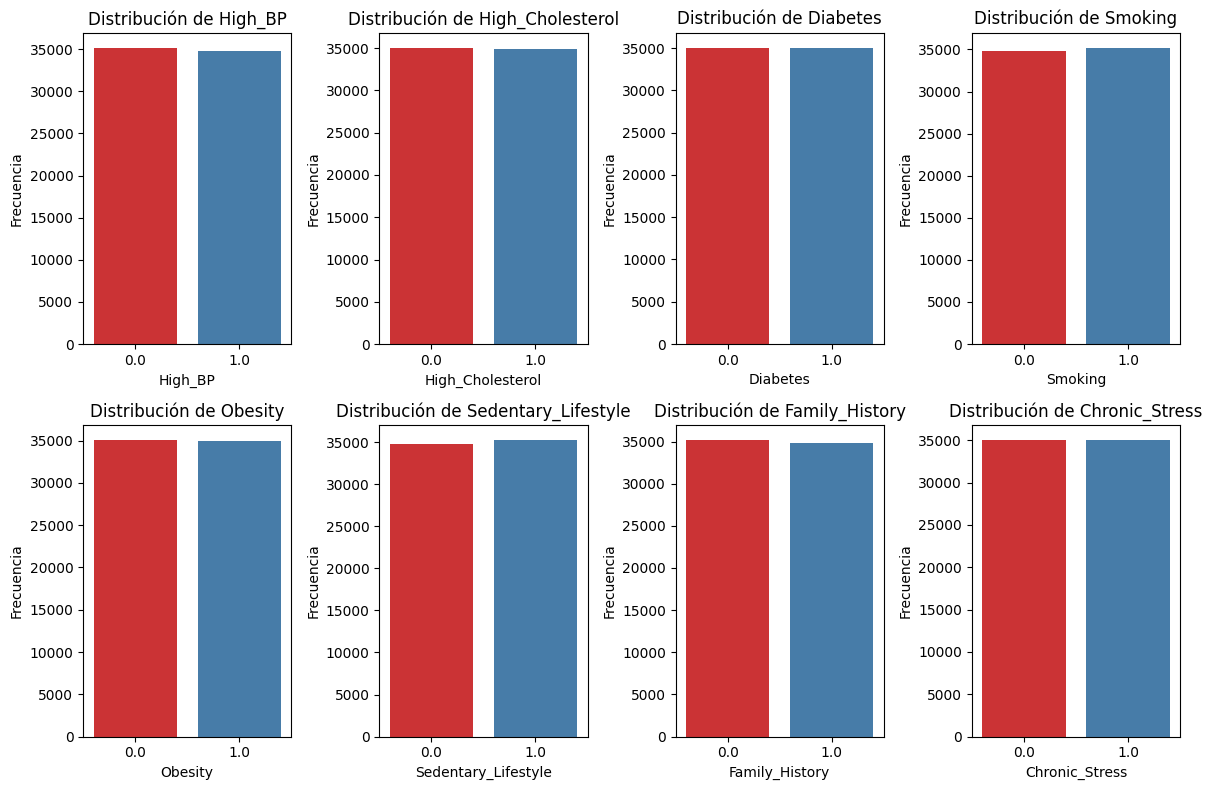

In [8]:
# Distribución de factores de riesgo
risk_factors = ['High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress']
plt.figure(figsize=(12, 8))
for i, factor in enumerate(risk_factors, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=factor, data=data, palette='Set1', hue=factor, legend=False)
    plt.title(f'Distribución de {factor}')
    plt.xlabel(factor)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

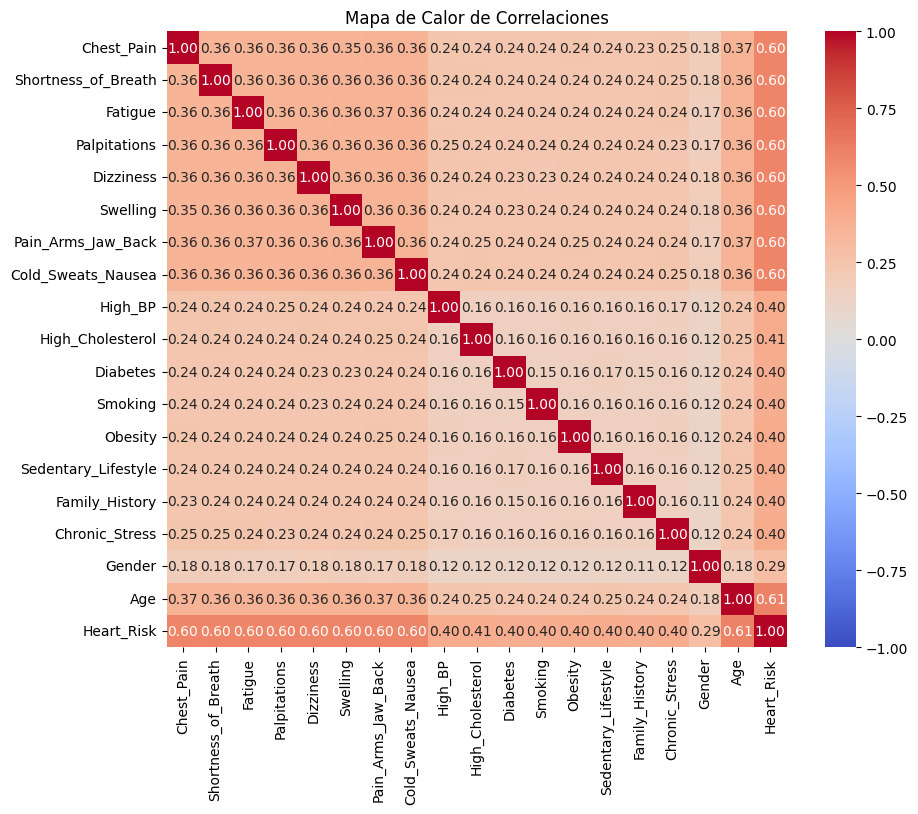

In [10]:
# Correlación entre variables
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

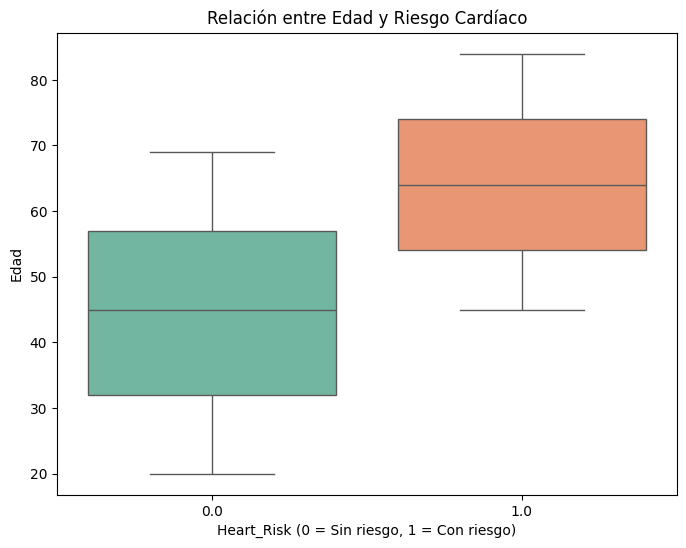

In [12]:
# Relación entre edad y riesgo cardíaco
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart_Risk', y='Age', data=data, palette='Set2', hue='Heart_Risk', legend=False)
plt.title('Relación entre Edad y Riesgo Cardíaco')
plt.xlabel('Heart_Risk (0 = Sin riesgo, 1 = Con riesgo)')
plt.ylabel('Edad')
plt.show()

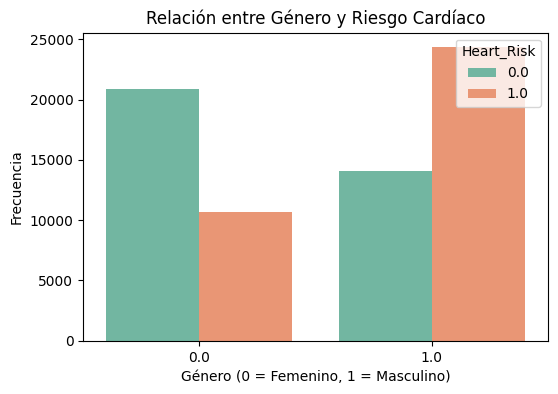

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Heart_Risk', data=data, palette='Set2')
plt.title('Relación entre Género y Riesgo Cardíaco')
plt.xlabel('Género (0 = Femenino, 1 = Masculino)')
plt.ylabel('Frecuencia')
plt.legend(title='Heart_Risk', loc='upper right')
plt.show()

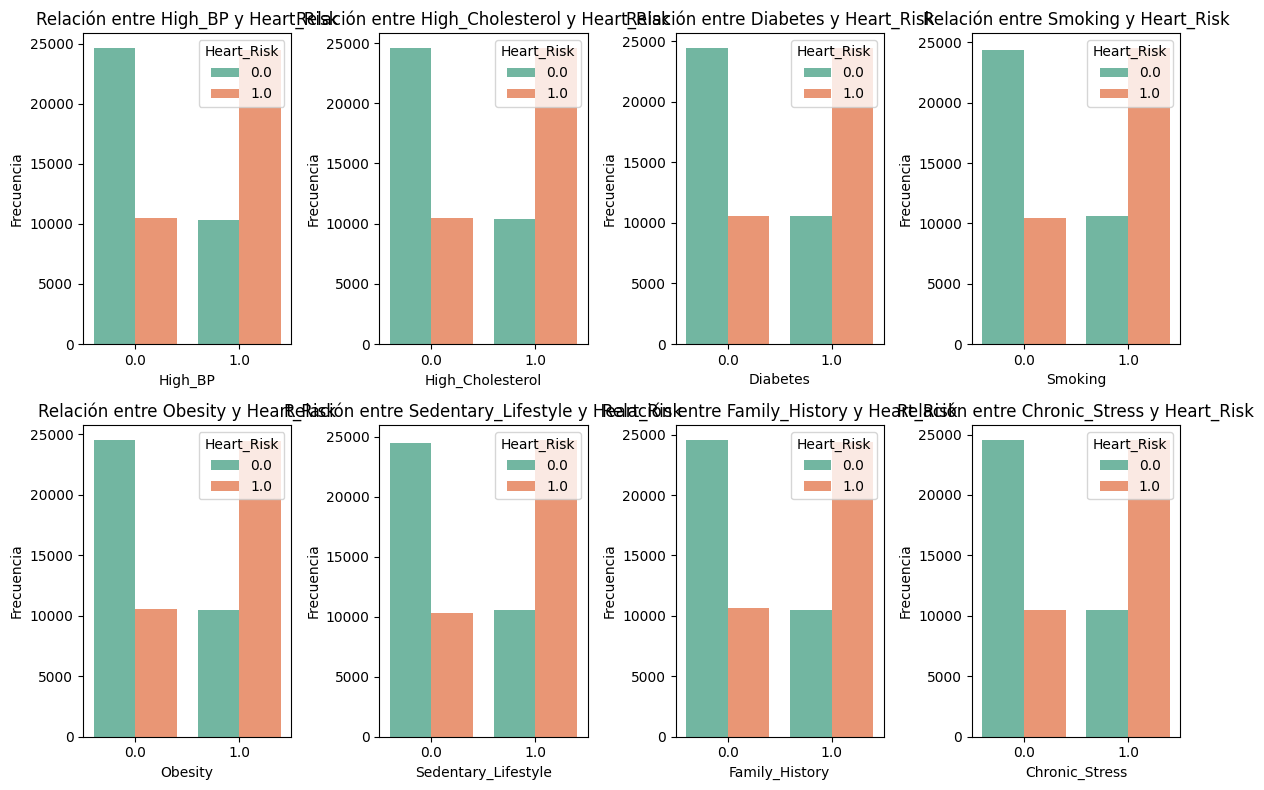

In [16]:
plt.figure(figsize=(12, 8))
for i, factor in enumerate(risk_factors, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=factor, hue='Heart_Risk', data=data, palette='Set2')
    plt.title(f'Relación entre {factor} y Heart_Risk')
    plt.xlabel(factor)
    plt.ylabel('Frecuencia')
    plt.legend(title='Heart_Risk', loc='upper right')
plt.tight_layout()
plt.show()

## Clustering y Prediccion


In [ ]:


# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns=['Heart_Risk'])
y = data['Heart_Risk']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

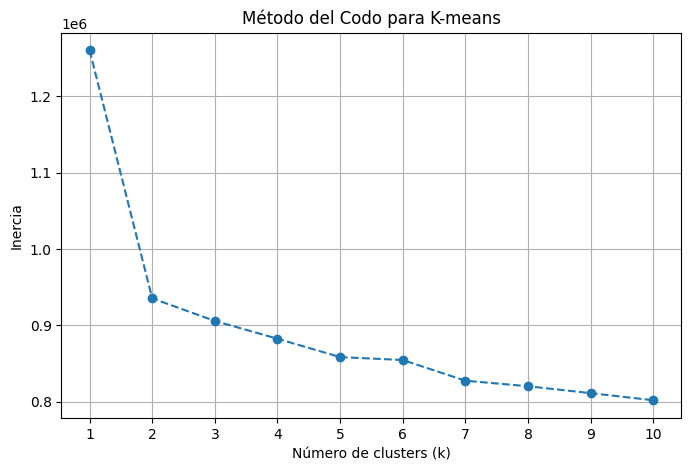

In [3]:
inertia = []
k_values = range(1, 11)  # Probamos con 1 a 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.xticks(k_values)
plt.grid()
plt.show()

In [4]:
k = 3  # Ajusta este valor según el gráfico

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar la información de los clusters al dataset
X['Cluster'] = clusters

In [5]:
X['Cluster'].value_counts()

Cluster
0    34688
1    24642
2    10670
Name: count, dtype: int64

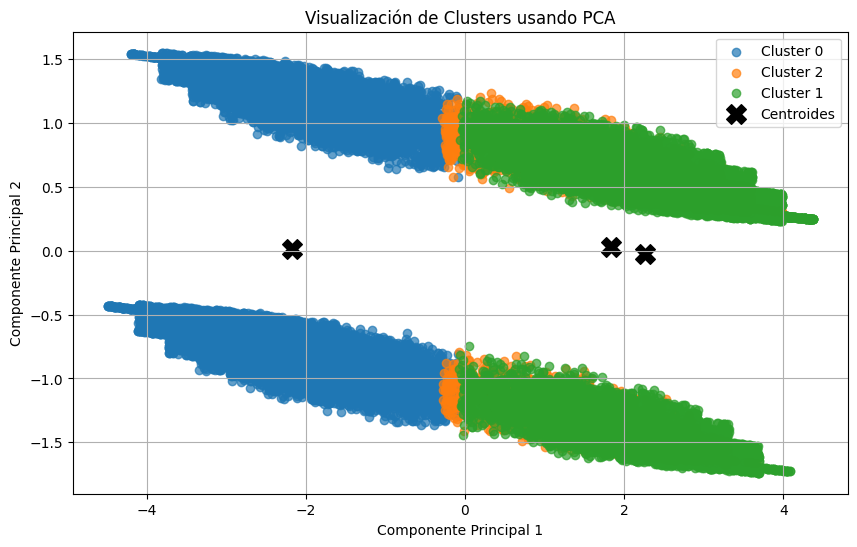

In [6]:
# Reducir la dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)  # Reducimos a 2 dimensiones para poder graficar
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con las componentes principales y los clusters
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = clusters

# Graficar los clusters
plt.figure(figsize=(10, 6))
for cluster in df_pca['Cluster'].unique():
    plt.scatter(df_pca[df_pca['Cluster'] == cluster]['Componente 1'],
                df_pca[df_pca['Cluster'] == cluster]['Componente 2'],
                label=f'Cluster {cluster}', alpha=0.7)

# Graficar los centroides de los clusters
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='black', label='Centroides')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clusters usando PCA')
plt.legend()
plt.grid()
plt.show()

In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_regressor.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R²): {r2}')

Error Cuadrático Medio (MSE): 0.006612607142857142
Coeficiente de Determinación (R²): 0.9735495692693525


In [ ]:
predictions = []